In [1]:
# Loading the required packages and libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('housing-price.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,250000


In [4]:
df.shape

(1460, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   MSZoning      1460 non-null   object 
 3   LotFrontage   1201 non-null   float64
 4   LotArea       1460 non-null   int64  
 5   Street        1460 non-null   object 
 6   Alley         91 non-null     object 
 7   LotShape      1460 non-null   object 
 8   LandContour   1460 non-null   object 
 9   Utilities     1460 non-null   object 
 10  LotConfig     1460 non-null   object 
 11  LandSlope     1460 non-null   object 
 12  Neighborhood  1460 non-null   object 
 13  Condition1    1460 non-null   object 
 14  Condition2    1460 non-null   object 
 15  BldgType      1460 non-null   object 
 16  HouseStyle    1460 non-null   object 
 17  OverallQual   1460 non-null   int64  
 18  OverallCond   1460 non-null 

In [6]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,755000.000000


In [7]:
# Checking the null values
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
SalePrice          0
dtype: int64

<AxesSubplot:>

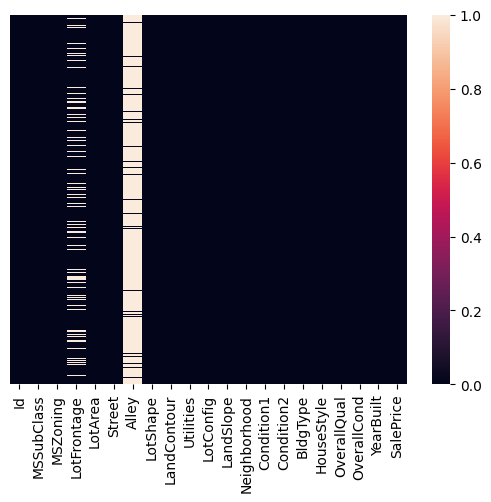

In [8]:
# heatmap for visualizing the null vaues
sns.heatmap(df.isnull(),yticklabels = False,cbar = True)

In [9]:
# Handling missing data for MSZoning
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [10]:
df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0]) # replacing with mode

In [11]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean()) # replacing with mean for train

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   MSZoning      1460 non-null   object 
 3   LotFrontage   1460 non-null   float64
 4   LotArea       1460 non-null   int64  
 5   Street        1460 non-null   object 
 6   Alley         91 non-null     object 
 7   LotShape      1460 non-null   object 
 8   LandContour   1460 non-null   object 
 9   Utilities     1460 non-null   object 
 10  LotConfig     1460 non-null   object 
 11  LandSlope     1460 non-null   object 
 12  Neighborhood  1460 non-null   object 
 13  Condition1    1460 non-null   object 
 14  Condition2    1460 non-null   object 
 15  BldgType      1460 non-null   object 
 16  HouseStyle    1460 non-null   object 
 17  OverallQual   1460 non-null   int64  
 18  OverallCond   1460 non-null 

In [13]:
df.drop(['Alley'],axis = 1, inplace = True) # dropping the Alley features as it has a lot of missing values for train

In [14]:
df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [15]:
df['Utilities'] = df['Utilities'].fillna(df['Utilities'].mode()[0]) # replacing with mode

In [16]:
df.isnull().any()

Id              False
MSSubClass      False
MSZoning        False
LotFrontage     False
LotArea         False
Street          False
LotShape        False
LandContour     False
Utilities       False
LotConfig       False
LandSlope       False
Neighborhood    False
Condition1      False
Condition2      False
BldgType        False
HouseStyle      False
OverallQual     False
OverallCond     False
YearBuilt       False
SalePrice       False
dtype: bool

<AxesSubplot:>

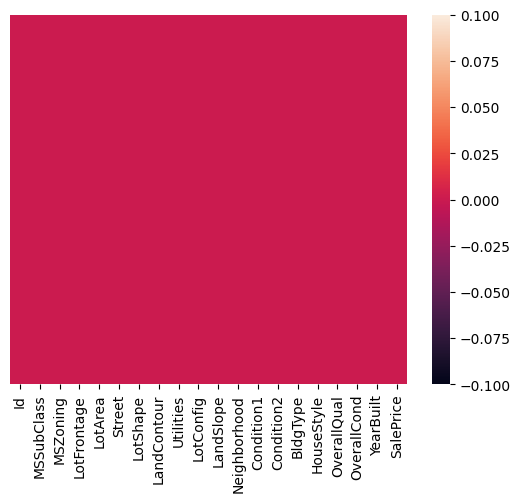

In [17]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   MSZoning      1460 non-null   object 
 3   LotFrontage   1460 non-null   float64
 4   LotArea       1460 non-null   int64  
 5   Street        1460 non-null   object 
 6   LotShape      1460 non-null   object 
 7   LandContour   1460 non-null   object 
 8   Utilities     1460 non-null   object 
 9   LotConfig     1460 non-null   object 
 10  LandSlope     1460 non-null   object 
 11  Neighborhood  1460 non-null   object 
 12  Condition1    1460 non-null   object 
 13  Condition2    1460 non-null   object 
 14  BldgType      1460 non-null   object 
 15  HouseStyle    1460 non-null   object 
 16  OverallQual   1460 non-null   int64  
 17  OverallCond   1460 non-null   int64  
 18  YearBuilt     1460 non-null 

In [19]:
df.dropna(inplace=True)

In [20]:
# creating the list of categorical features
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle']

In [21]:
len(columns)

12

In [22]:
# function to convert categorical variables to one hot encoding
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [23]:
# making a copy of dataframe for future use
main_df=df.copy()

In [24]:
final_df = main_df.copy()

In [25]:
final_df.shape

(1460, 20)

In [26]:
final_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,250000


In [27]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle


In [28]:
final_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,SalePrice,FV,RH,...,RRAn,RRNe,RRNn,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl
0,1,60,65.0,8450,7,5,2003,208500,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,20,80.0,9600,6,8,1976,181500,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3,60,68.0,11250,7,5,2001,223500,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,70,60.0,9550,7,5,1915,140000,0,0,...,0,0,0,0,0,0,0,1,0,0
4,5,60,84.0,14260,8,5,2000,250000,0,0,...,0,0,0,0,0,0,0,1,0,0


In [32]:
# removing duplicated columns
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [33]:
final_df.to_csv("housing-price-clean.csv",index=False)

PermissionError: [Errno 13] Permission denied: 'housing-price-clean.csv'

In [ ]:
# separating the test and training data
df_Train=final_df.iloc[:1000,:]
df_Test=final_df.iloc[1000:,:]

In [ ]:
df_Train.shape

In [ ]:
# preparing data for feeding into model
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']
X_test=df_Test.drop(['SalePrice'],axis=1)
y_test=df_Test['SalePrice']

In [ ]:
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

In [ ]:
# implementing Simple linear regression regressor
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

In [ ]:
# predicting the house prices
y_predict = regressor.predict(X_test)

In [ ]:
y_predict

In [ ]:
# implementing Simple linear regression regressor
from sklearn.svm import SVR
regressor_svr = SVR()
regressor_svr.fit(X_train,y_train)

In [ ]:
# predicting the house prices
y_predict = regressor_svr.predict(X_test)

In [ ]:
y_predict

In [ ]:
# implementing Simple linear regression regressor
from sklearn.ensemble import RandomForestRegressor
regressor_rf=RandomForestRegressor()
regressor_rf.fit(X_train,y_train)

In [ ]:
# predicting the house prices
y_predict = regressor_rf.predict(X_test)

In [ ]:
y_predict